In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# importando a base inicial
# Iremos trabalhar com a base do Titanic


df = pd.read_csv(r'C:\Users\Gabriel Scopel\Documents\Python para análise de dados\Curso de Python - Base de Dados\Projeto Final/train.csv')

In [55]:
df.head() #exibindo as primeiras linhas do dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1 - Entendendo os tipos de variáveis que temos na base de dados

In [56]:
# exibindo o tipo de dado que cada coluna é feita
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
# Criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object': 
        quali.append(i)
    else:
        quanti.append(i)

In [58]:
print('Lista Quanti: ',quanti)
print('Lista Quali: ',quali)

Lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# 2 - Estatística Descritiva e Tabelas de Frequência

In [59]:
quanti

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [60]:
# Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva
# relembrando que df é a variável que importamos o dataframe do titanic

df_quanti = df[quanti]

In [61]:
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [62]:
# Estatística Descritiva

df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
# Calculando Mediana que não está no comando anterior

df.median()

C:\Users\Gabriel Scopel\AppData\Local\Temp\ipykernel_11672\2596655905.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [64]:
# Tabela de frequência para  as variáveis qualitativas
# Criando o df_quali
df_quali = df[quali]

# Fazendo a tabela de frequência para a variável Sex
# exibirá quantas pessoas temos do sexo masculino e quantas do feminino
df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [65]:
# Fazendo todas as tabelas de frequência de uma vez só

# Vamos desconsiderar a variável Name que sempre será única para cada passageiro

for i in df_quali.columns:
    if i == 'Name': # não é interessante saber a tabela de frequência da variável Name pois cada nome é único
        pass
    else:
        print('----------------------')
        print('Variável: ',i)
        print(df_quali.groupby(i).Name.count())
        print('----------------------')

----------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
----------------------
----------------------
Variável:  Ticket
Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
----------------------
----------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
----------------------
----------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
----------------------


# 3 - Detecção de Dados Nulos

In [66]:
# Para cada variável no DF, iremos pegar a quantidade de dados nulos

# Iremos visualizar quantos nulos temos em cada variável
# Vamos criar uma tabela para visualizar isso (um Data Frame)

nulos = pd.DataFrame() #criando um dataframe
nulos['Variável'] = df.columns # preenchendo o dataframe, a coluna Variável terá cada variável do dataframe analisado

In [67]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [68]:
# Vamos colocar na outra coluna, a quantidade de nulos no DF

nulos['Quantidade'] = pd.Series() # criando a coluna quantidade e preenchendo com valores vazios
nulos ['Porcentagem'] = pd.Series()

for i in nulos.index: #percorrendo as linhas do dataframe nulo
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum() # o método isna retorna 1 se for True 0 se for False, portanto, se somarmos a qtde de vezes que é true (valor não numérico) teremos a qtde de vezes que é um valor NAN
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

C:\Users\Gabriel Scopel\AppData\Local\Temp\ipykernel_11672\3578054197.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['Quantidade'] = pd.Series() # criando a coluna quantidade e preenchendo com valores vazios
C:\Users\Gabriel Scopel\AppData\Local\Temp\ipykernel_11672\3578054197.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos ['Porcentagem'] = pd.Series()
C:\Users\Gabriel Scopel\AppData\Local\Temp\ipykernel_11672\3578054197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum() # o método isna reto

In [69]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0.0,0.000000
1,Survived,0.0,0.000000
2,Pclass,0.0,0.000000
3,Name,0.0,0.000000
4,Sex,0.0,0.000000
5,Age,177.0,19.865320
6,SibSp,0.0,0.000000
7,Parch,0.0,0.000000
8,Ticket,0.0,0.000000
9,Fare,0.0,0.000000


### Qual estratégia usar?

#### Para a variável Cabin, temos muitos dados vazios, se removermos todas as linhas vazias, podemos acabar com um dataframe sem quase nenhuma linha para usar.

#### No caso da Variável Age também temos uma quantidade relevante de vazios (~20%)


#### Apenas na variável Embarked temos poucos vazios (0,22%)


### Faremos o seguinte

#### Removeremos as linhas vazias na variável Embarked
#### Para Age e Cabin iremos preencher

#### Age é quantitativa (podemos usar a média de idade para preencher os vazios)
#### Cabin é qualitativa (podemos usar a moda, cabine que mais se repete para preencher)


In [70]:
# Removendo as linhas da variável Embarked usando dropna

df2 = df.dropna(subset=['Embarked'])

In [71]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
# Preenchendo a variável Age
df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean()) #preenchendo os valores vazios da coluna age com a média das idades

In [73]:
#Verificando se de fato houve remoção dos valores nulos
df3.Age.isna().sum()

0

In [74]:
# Preenchendo a variável Cabin com sua moda

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [75]:
# Temos mais de uma Moda na variável Cabin (mais de um valor é o que mais se repete)

# Então iremos escolher um valor dentro da moda e preencher aleatoriamente
moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [76]:
# Temos uma lista com os valores da Moda
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [77]:
# Preenchendo com valores aleatórios da moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))

In [78]:
df4.Cabin.isna().sum()

0

In [79]:
# exibindo o dataframe finalizado
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# 4 - Detecção de outliers

In [80]:
df4.boxplot()

<Axes: >

In [81]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

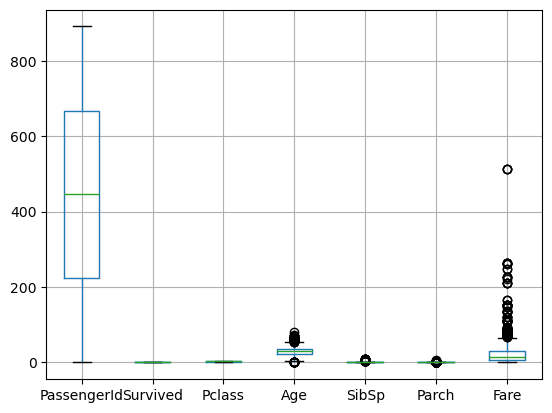

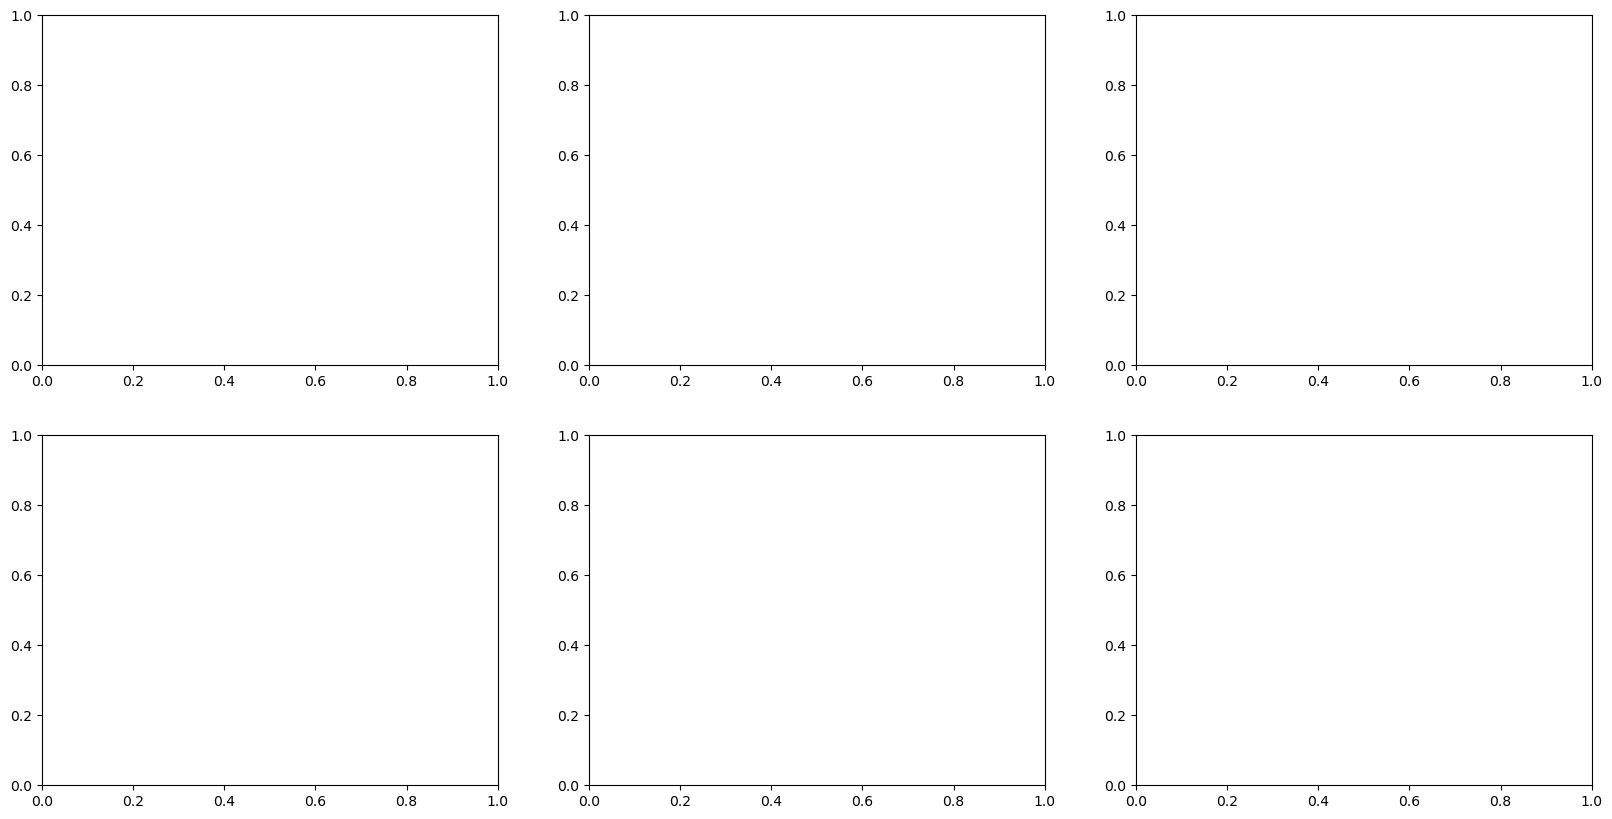

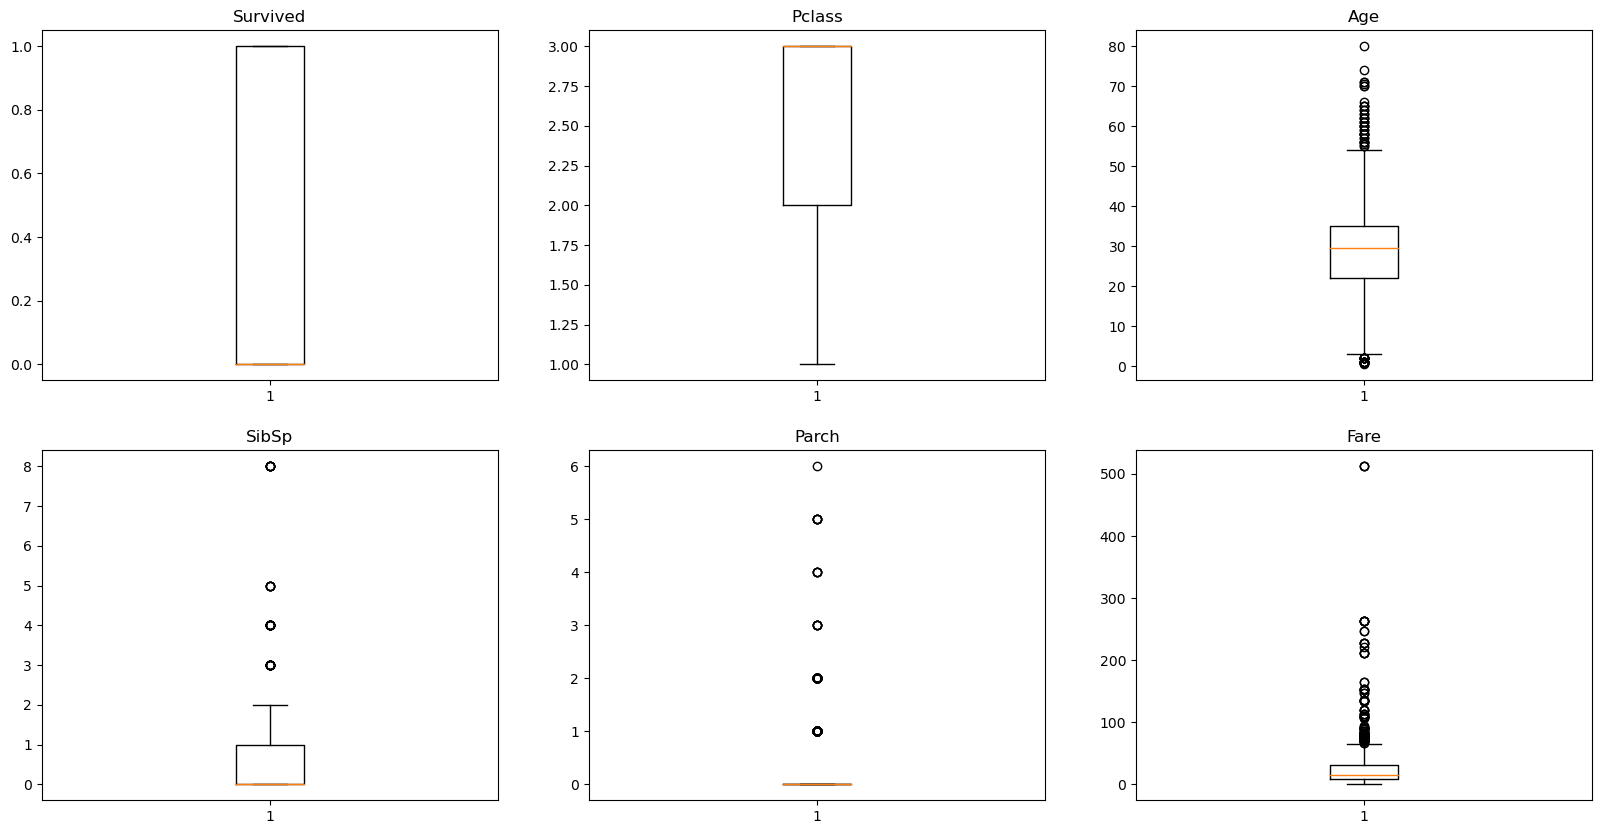

In [82]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

axs[0,0].set_title('Survived')
axs[0,0].boxplot(df4.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)

axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)

axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)

axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)
plt.show()

### Dependendo da Variável temos uma quantidade muito grande de outliers, por exemplo Parch, Age, Fare

### Vamos estudar estas 3 variáveis calculando qual a % de outliers

In [83]:
# Calculo dos Outliers

# Todos os pontos que estão fora do limite superior e inferior da amostra

# Limite superior = Q3 + 1,5 * DistanciaInterquartil
# Limite inferior = Q1 - 1,5 * DistanciaInterquartil

# Distância Interquartil = Valor do 3º Quartil - Valor do 1º Quartil (Q3 - Q1)


# Fazendo este cálculo para estas o Dataframe todo (apenas o quantitativo)

df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []

for i in df4_quanti.columns:
    
    q3 = np.quantile(df4_quanti[i], 0.75)
    q1 = np.quantile(df4_quanti[i], 0.25)
    dist = q3 - q1 
    lim_inf = q1 - 1.5*dist
    lim_sup = q3 + 1.5*dist
    
    print('--------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('-------------')

    outlier = 0

    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier= outlier + 1
        else: 
            pass
        
    outliers.append(outlier)
    
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100

--------------
PassengerId
444.0
-442.0
1334.0
-------------
--------------
Survived
1.0
-1.5
2.5
-------------
--------------
Pclass
1.0
0.5
4.5
-------------
--------------
Age
13.0
2.5
54.5
-------------
--------------
SibSp
1.0
-1.5
2.5
-------------
--------------
Parch
0.0
0.0
0.0
-------------
--------------
Fare
23.1042
-26.7605
65.6563
-------------


In [84]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,65,7.311586
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,114,12.823397


### Nestes casos (Age e SibSp) a quantidade de outliers é pouco influente, poderíamos fazer um drop nestas linhas.

### No caso do Parch e Fare, teríamos que entender se são variáveis que importam muito para resolver o problema, para saber como tratar os outliers (de repente estudando eles separadamente, fazendo um modelo específico segmentando este público)

### Para este problema em especifico vamos manter os outliers apesar de estarem identificados

## 5 - Visualização de Dados

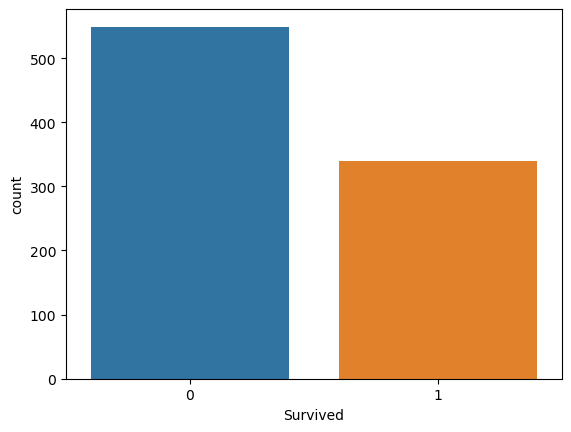

In [85]:
# Quantas pessoas morreram e quantas sobreviveram

sns.countplot(x='Survived', data=df4)
plt.show()

In [86]:
# Quantas pessoas morreram e sobreviveram , separadas por sexo

df4.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

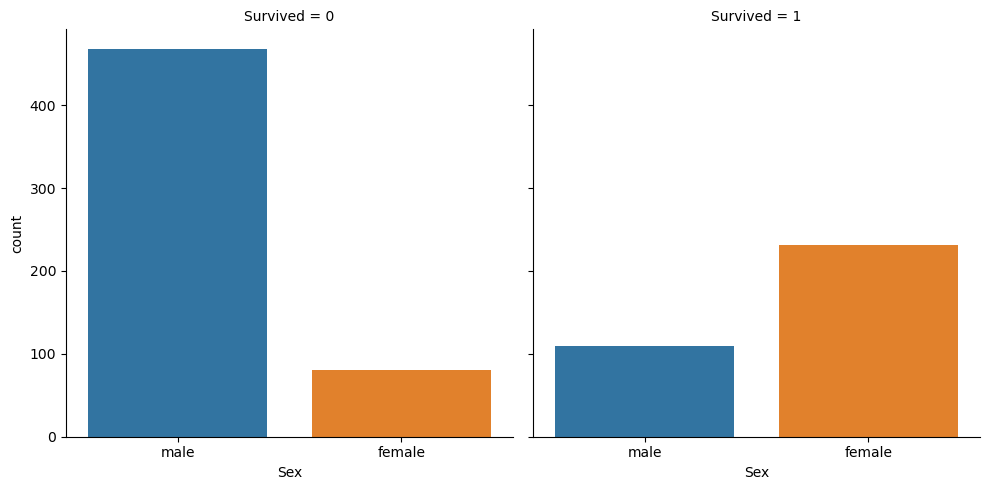

In [87]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df4);
plt.show()

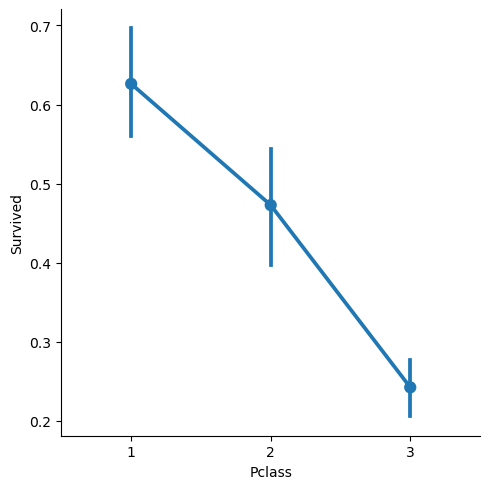

In [88]:
sns.catplot(x='Pclass',y='Survived', kind='point', data=df4);
plt.show()

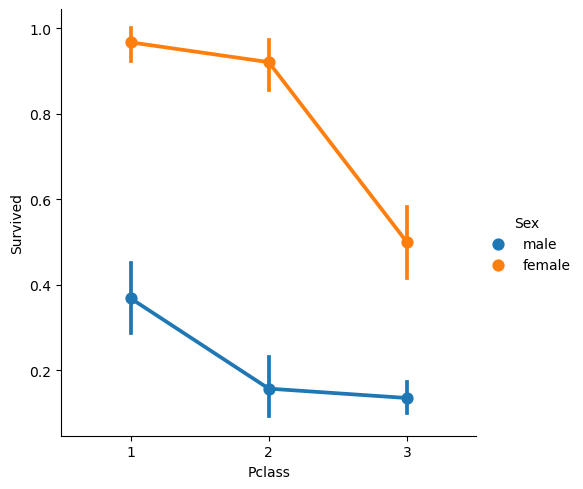

In [90]:
sns.catplot(x='Pclass',y='Survived',hue='Sex', kind='point', data=df4);
plt.show()

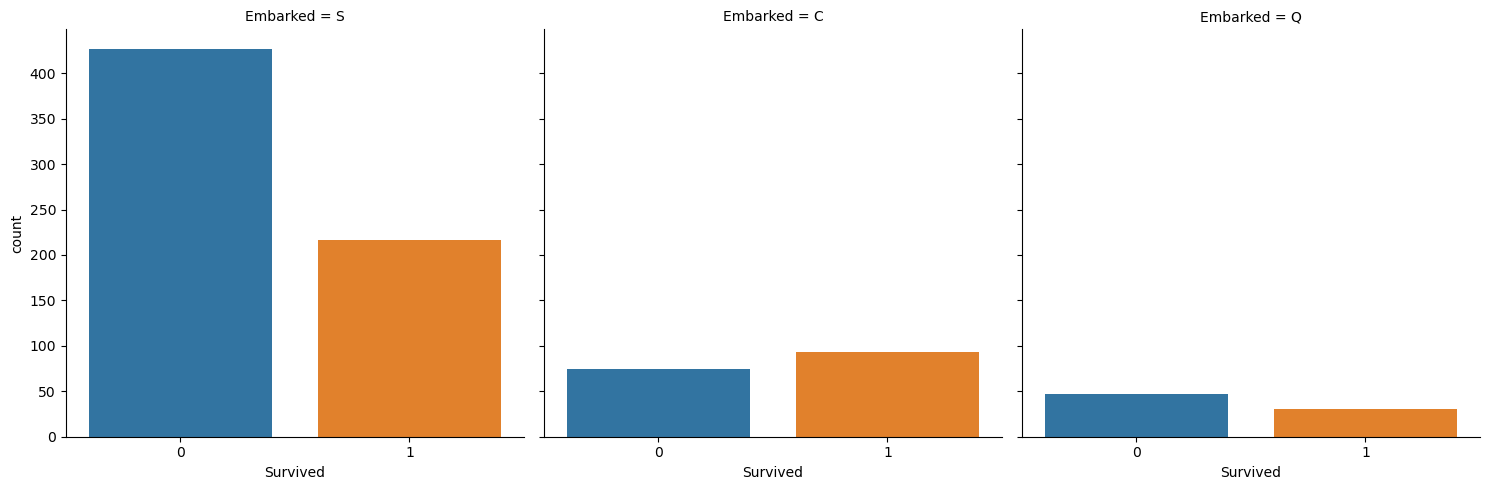

In [91]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df4);
plt.show()

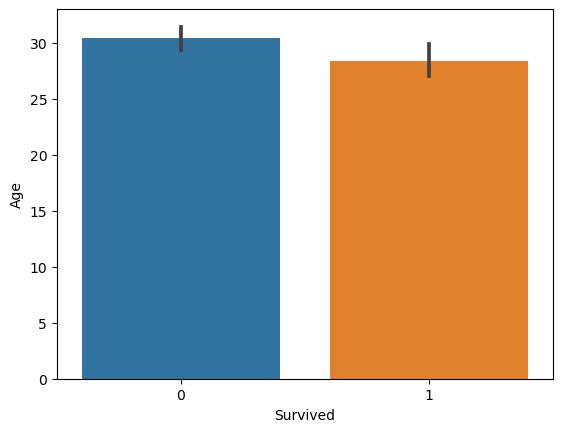

In [92]:
sns.barplot(x='Survived', y='Age', data=df4);
plt.show()

C:\Users\Gabriel Scopel\AppData\Local\Temp\ipykernel_11672\2807122489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot = True, linewidths=1.5 , fmt = '.2f')


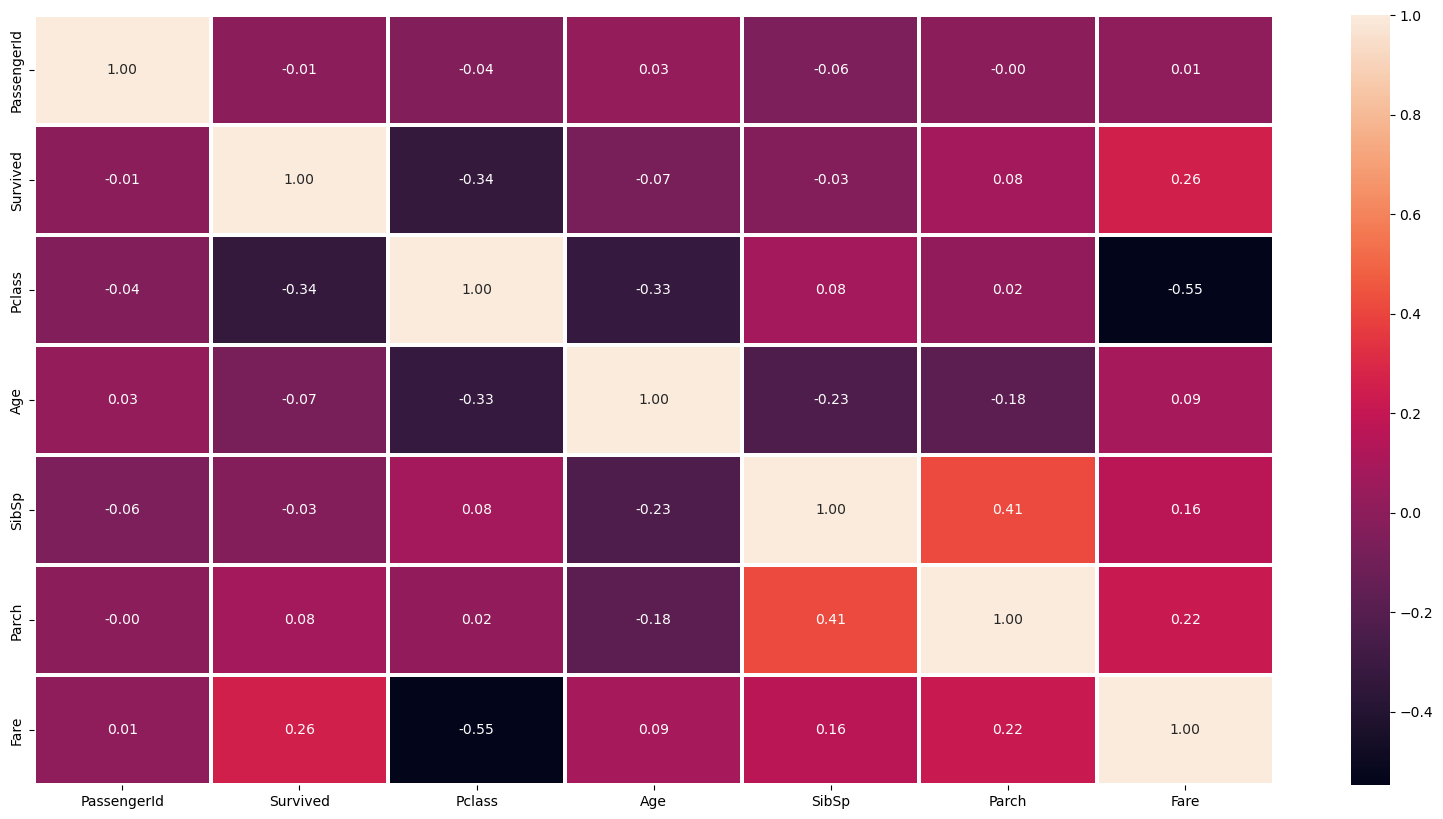

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(), annot = True, linewidths=1.5 , fmt = '.2f')
plt.show()